In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
bt_data = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                      parse_dates=['Date'],
                      index_col=['Date'])

In [3]:
bt_data.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
bt_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
bt_data.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


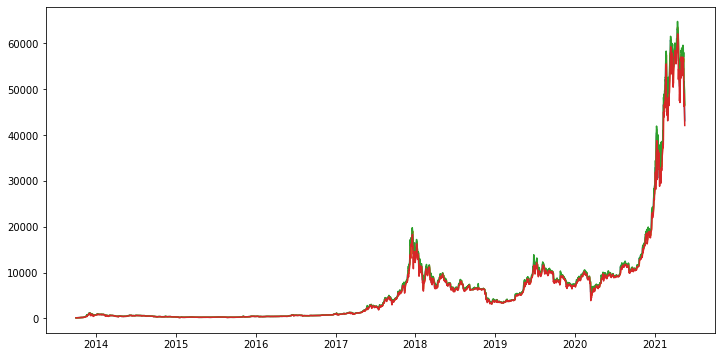

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(bt_data.drop('Currency', axis=1))

In [7]:
df = pd.DataFrame(data=bt_data['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Price'})

In [8]:
df

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


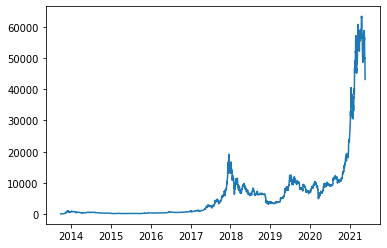

In [9]:
plt.plot(df)

In [10]:
import csv
from datetime import datetime

In [11]:
timesteps = df.index.to_numpy()
prices = df["Price"].to_numpy()

In [12]:
timesteps = []
btc_price = []
with open(r'D:\1jupyter\Datasets\btc_data.csv', 'r') as f:
    csv_reader=csv.reader(f, delimiter=',')
    next(csv_reader)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
        btc_price.append(float(line[2]))
        
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

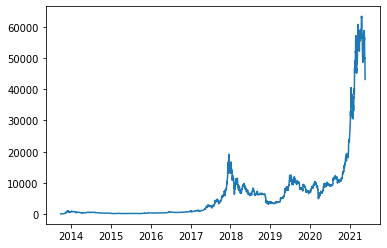

In [13]:
plt.plot(timesteps,btc_price)

In [14]:
split = int(0.8*len(btc_price))
X_train,y_train = timesteps[:split], btc_price[:split]

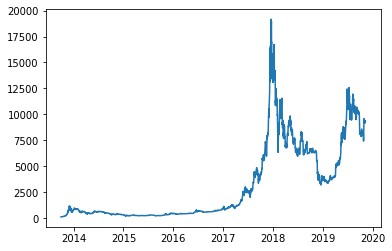

In [15]:
plt.plot(X_train,y_train)

In [16]:
X_test, y_test = timesteps[split:], btc_price[split:]

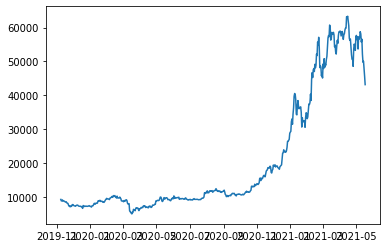

In [17]:
plt.plot(X_test, y_test)

In [18]:
len(X_test), len(y_test), len(X_train), len(y_train)

(558, 558, 2229, 2229)

In [19]:
import matplotlib.pyplot as plt

In [20]:
import matplotlib.pyplot as plt
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

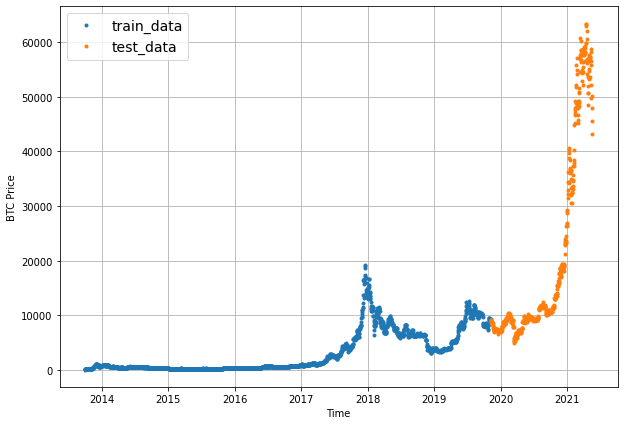

In [21]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label='train_data')
plot_time_series(timesteps=X_test, values=y_test, label='test_data')

## Naive Forecast model0

In [22]:
naive_forecast = y_test[:-1]

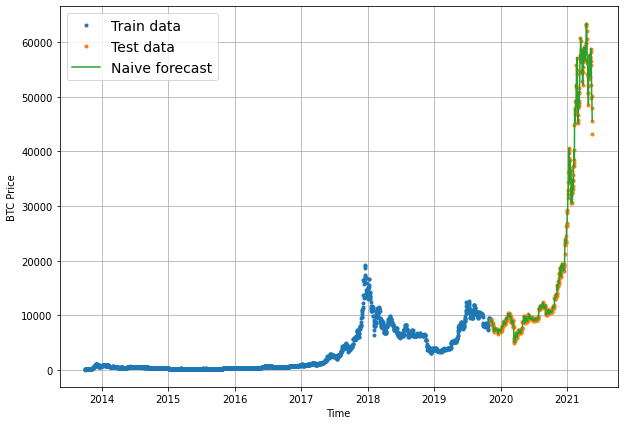

In [23]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

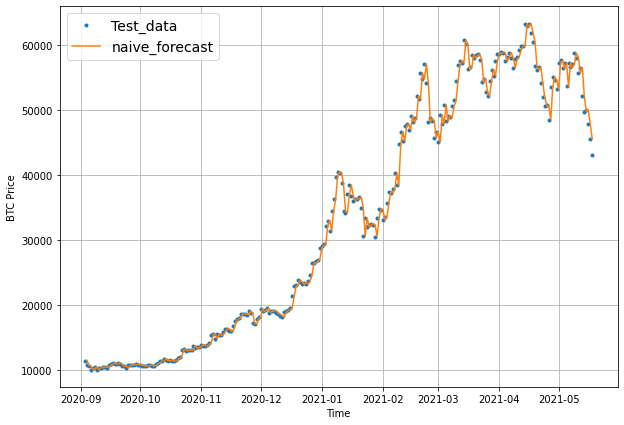

In [24]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test, start=300, values=y_test, label='Test_data')
plot_time_series(timesteps=X_test[1:], start=300, values=naive_forecast, format='-', label='naive_forecast')

In [25]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

def evaluate_preds(y_true, y_pred):
  
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [26]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)

In [27]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## model2

In [28]:
HORIZON = 1
WINDOW_SIZE = 7

In [29]:
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0) 
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  windowed_array = x[window_indexes]
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [30]:
import numpy as np

In [31]:
full_windows, full_labels = make_windows(x=prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [32]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [33]:
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1-test_split)) 
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [34]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [35]:
import os
def create_model_checkpoint(model_name, save_path="timeseries_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0, 
                                            save_best_only=True) 

In [36]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")                     
], name="model_1_dense") 

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) 

model_1.fit(x=train_windows,
            y=train_labels, 
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 2s 35ms/step - loss: 780.3455 - mae: 780.3455 - val_loss: 2279.6528 - val_mae: 2279.6528
Epoch 2/100
18/18 [==============================] - 0s 21ms/step - loss: 247.6756 - mae: 247.6756 - val_loss: 1005.9992 - val_mae: 1005.9992
Epoch 3/100
18/18 [==============================] - 0s 22ms/step - loss: 188.4116 - mae: 188.4116 - val_loss: 923.2863 - val_mae: 923.2863
Epoch 4/100
18/18 [==============================] - 0s 23ms/step - loss: 169.4340 - mae: 169.4340 - val_loss: 900.5871 - val_mae: 900.5871
Epoch 5/100
18/18 [==============================] - 0s 22ms/step - loss: 165.0895 - mae: 165.0895 - val_loss: 895.2237 - val_mae: 895.2237
Epoch 6/100
18/18 [==============================] - 0s 27ms/step - loss: 158.5210 - mae: 158.5210 - val_loss: 855.1984 - val_mae: 855.1984
Epoch 7/100
18/18 [==============================] - 0s 23ms/step - loss: 151.3566 - mae: 151.3566 - val_loss: 840.9167 - val_mae: 840.9167
Epoch 8/100
18/1

18/18 [==============================] - 0s 5ms/step - loss: 111.9867 - mae: 111.9867 - val_loss: 604.7635 - val_mae: 604.7635
Epoch 35/100
18/18 [==============================] - 0s 23ms/step - loss: 110.9451 - mae: 110.9451 - val_loss: 593.4648 - val_mae: 593.4648
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 114.4816 - mae: 114.4816 - val_loss: 608.0072 - val_mae: 608.0072
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2016 - mae: 110.2016 - val_loss: 597.2308 - val_mae: 597.2308
Epoch 38/100
18/18 [==============================] - 0s 4ms/step - loss: 112.2372 - mae: 112.2372 - val_loss: 637.9801 - val_mae: 637.9801
Epoch 39/100
18/18 [==============================] - 1s 30ms/step - loss: 115.1289 - mae: 115.1289 - val_loss: 587.4679 - val_mae: 587.4679
Epoch 40/100
18/18 [==============================] - 0s 4ms/step - loss: 110.0854 - mae: 110.0854 - val_loss: 592.7119 - val_mae: 592.7119
Epoch 41/100
18/18 [===========

18/18 [==============================] - 0s 4ms/step - loss: 115.6827 - mae: 115.6827 - val_loss: 575.7388 - val_mae: 575.7388
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 110.9379 - mae: 110.9379 - val_loss: 659.6582 - val_mae: 659.6582
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4837 - mae: 111.4837 - val_loss: 570.1957 - val_mae: 570.1957
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 107.5948 - mae: 107.5948 - val_loss: 601.5936 - val_mae: 601.5936
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 108.9425 - mae: 108.9425 - val_loss: 592.8098 - val_mae: 592.8098
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 105.7717 - mae: 105.7717 - val_loss: 603.6178 - val_mae: 603.6178
Epoch 88/100
18/18 [==============================] - 0s 25ms/step - loss: 107.9217 - mae: 107.9217 - val_loss: 569.0501 - val_mae: 569.0501
Epoch 89/100
18/18 [============

In [37]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 585.9756 - mae: 585.9756


[585.9756469726562, 585.9756469726562]

In [38]:
model_1 = tf.keras.models.load_model('timeseries_experiments/model_1_dense')

In [39]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9509 - mae: 568.9509


[568.950927734375, 568.950927734375]

In [40]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [41]:
model_1_preds = make_preds(model_1, test_windows)

18/18 [==============================] - 0s 2ms/step


In [42]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)

In [43]:
model_1_results

{'mae': 568.9509,
 'mse': 1171743.5,
 'rmse': 1082.471,
 'mape': 2.544898,
 'mase': 0.9994892}

In [44]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

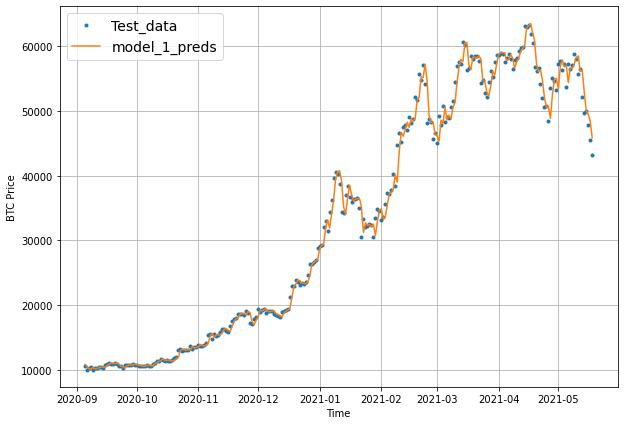

In [45]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

## Model2 with large windows

In [46]:
HORIZON = 1
WINDOW_SIZE = 30

In [47]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [48]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [49]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")                     
], name="model_2_dense") 

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) 

model_2.fit(x=train_windows,
            y=train_labels, 
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
18/18 [==============================] - 1s 34ms/step - loss: 1097.0399 - mae: 1097.0399 - val_loss: 3900.2537 - val_mae: 3900.2537
Epoch 2/100
18/18 [==============================] - 0s 27ms/step - loss: 428.0732 - mae: 428.0732 - val_loss: 1587.0746 - val_mae: 1587.0746
Epoch 3/100
18/18 [==============================] - 1s 33ms/step - loss: 279.7655 - mae: 279.7655 - val_loss: 1220.6890 - val_mae: 1220.6890
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 224.3637 - mae: 224.3637 - val_loss: 1160.1571 - val_mae: 1160.1571
Epoch 5/100
18/18 [==============================] - 0s 25ms/step - loss: 187.9681 - mae: 187.9681 - val_loss: 1007.6486 - val_mae: 1007.6486
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 182.9174 - mae: 182.9174 - val_loss: 1019.5818 - val_mae: 1019.5818
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 187.7612 - mae: 187.7612 - val_loss: 1145.1759 - val_mae: 1145.1759
Epoch 

Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 137.7672 - mae: 137.7672 - val_loss: 969.4785 - val_mae: 969.4785
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 142.7820 - mae: 142.7820 - val_loss: 901.4064 - val_mae: 901.4064
Epoch 41/100
18/18 [==============================] - 0s 25ms/step - loss: 142.1888 - mae: 142.1888 - val_loss: 689.8060 - val_mae: 689.8060
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 130.9878 - mae: 130.9878 - val_loss: 751.3149 - val_mae: 751.3149
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 131.4450 - mae: 131.4450 - val_loss: 746.7272 - val_mae: 746.7272
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 137.5511 - mae: 137.5511 - val_loss: 751.4651 - val_mae: 751.4651
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 134.3822 - mae: 134.3822 - val_loss: 694.2699 - val_mae: 694.2699
Epoch 46/100
18/18 

Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 139.2674 - mae: 139.2674 - val_loss: 711.2965 - val_mae: 711.2965
Epoch 87/100
18/18 [==============================] - 0s 24ms/step - loss: 139.8416 - mae: 139.8416 - val_loss: 616.3276 - val_mae: 616.3276
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 134.8590 - mae: 134.8590 - val_loss: 1100.9899 - val_mae: 1100.9899
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 152.7612 - mae: 152.7612 - val_loss: 815.0576 - val_mae: 815.0576
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 160.4490 - mae: 160.4490 - val_loss: 1111.4733 - val_mae: 1111.4733
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 134.0435 - mae: 134.0435 - val_loss: 810.8100 - val_mae: 810.8100
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 127.9937 - mae: 127.9937 - val_loss: 781.3549 - val_mae: 781.3549
Epoch 93/100
18

In [50]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 665.5611 - mae: 665.5611


[665.5610961914062, 665.5610961914062]

In [51]:
model_2 = tf.keras.models.load_model('timeseries_experiments/model_2_dense/')

In [52]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 616.3276 - mae: 616.3276


[616.3275756835938, 616.3275756835938]

In [53]:
model_2_preds = make_preds(model_2, test_windows)

18/18 [==============================] - 0s 2ms/step


In [54]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)

In [55]:
model_2_results

{'mae': 616.3275,
 'mse': 1309630.0,
 'rmse': 1144.3907,
 'mape': 2.8121033,
 'mase': 1.0773466}

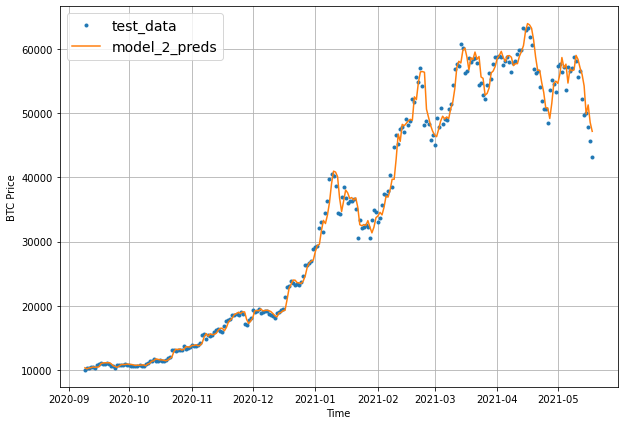

In [56]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## model3 with more horizons

In [57]:
HORIZON = 7
WINDOW_SIZE = 30

In [58]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [59]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [60]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")                     
], name="model_3_dense") 

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) 

model_3.fit(x=train_windows,
            y=train_labels, 
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
18/18 [==============================] - 1s 41ms/step - loss: 1476.6752 - mae: 1476.6752 - val_loss: 3088.5613 - val_mae: 3088.5613
Epoch 2/100
18/18 [==============================] - 0s 24ms/step - loss: 552.8943 - mae: 552.8943 - val_loss: 2462.4548 - val_mae: 2462.4548
Epoch 3/100
18/18 [==============================] - 0s 25ms/step - loss: 435.1978 - mae: 435.1978 - val_loss: 2283.1484 - val_mae: 2283.1484
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 391.9787 - mae: 391.9787 - val_loss: 1975.1218 - val_mae: 1975.1218
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 357.9485 - mae: 357.9485 - val_loss: 2000.1556 - val_mae: 2000.1556
Epoch 6/100
18/18 [==============================] - 0s 25ms/step - loss: 332.6704 - mae: 332.6704 - val_loss: 1723.4186 - val_mae: 1723.4186
Epoch 7/100
18/18 [==============================] - 0s 24ms/step - loss: 309.9903 - mae: 309.9903 - val_loss: 1591.9688 - val_mae: 1591.9688
Epoch

18/18 [==============================] - 0s 5ms/step - loss: 239.6820 - mae: 239.6820 - val_loss: 1426.0742 - val_mae: 1426.0742
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 239.1188 - mae: 239.1188 - val_loss: 1442.6663 - val_mae: 1442.6663
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 246.8635 - mae: 246.8635 - val_loss: 1347.2452 - val_mae: 1347.2452
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 239.3242 - mae: 239.3242 - val_loss: 1365.7219 - val_mae: 1365.7219
Epoch 44/100
18/18 [==============================] - 0s 24ms/step - loss: 250.1504 - mae: 250.1504 - val_loss: 1293.0472 - val_mae: 1293.0472
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 243.7763 - mae: 243.7763 - val_loss: 1505.8341 - val_mae: 1505.8341
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 241.1997 - mae: 241.1997 - val_loss: 1299.8013 - val_mae: 1299.8013
Epoch 47/100
18/18

Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: 226.7606 - mae: 226.7606 - val_loss: 1259.4495 - val_mae: 1259.4495
Epoch 92/100
18/18 [==============================] - 0s 3ms/step - loss: 225.4304 - mae: 225.4304 - val_loss: 1244.5864 - val_mae: 1244.5864
Epoch 93/100
18/18 [==============================] - 0s 3ms/step - loss: 232.3920 - mae: 232.3920 - val_loss: 1305.4161 - val_mae: 1305.4161
Epoch 94/100
18/18 [==============================] - 0s 4ms/step - loss: 227.1455 - mae: 227.1455 - val_loss: 1278.3682 - val_mae: 1278.3682
Epoch 95/100
18/18 [==============================] - 0s 3ms/step - loss: 226.4553 - mae: 226.4553 - val_loss: 1282.0594 - val_mae: 1282.0594
Epoch 96/100
18/18 [==============================] - 0s 3ms/step - loss: 229.8147 - mae: 229.8147 - val_loss: 1359.4149 - val_mae: 1359.4149
Epoch 97/100
18/18 [==============================] - 0s 4ms/step - loss: 226.3261 - mae: 226.3261 - val_loss: 1261.2341 - val_mae: 1261.2341
Epoch 

In [61]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1300.1522 - mae: 1300.1522


[1300.1522216796875, 1300.1522216796875]

In [62]:
model_3 = tf.keras.models.load_model('timeseries_experiments/model_3_dense/')

In [63]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.5063 - mae: 1237.5063


[1237.50634765625, 1237.50634765625]

In [64]:
model_3_preds = make_preds(model_3, test_windows)

18/18 [==============================] - 0s 1ms/step


In [65]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)

In [66]:
model_3_results

{'mae': array([ 513.6056  ,  355.08328 ,  327.17075 ,  358.5106  ,  420.53293 ,
         537.854   ,  545.6617  ,  485.9228  ,  584.49713 ,  687.38214 ,
         836.2264  ,  755.1576  ,  731.4957  ,  775.3399  ,  567.95544 ,
         266.80865 ,  188.80217 ,  188.10805 ,  253.095   ,  301.43256 ,
         151.10721 ,  196.8148  ,  191.46178 ,  231.65031 ,  143.61125 ,
         122.59089 ,  132.78871 ,  190.81174 ,  179.15994 ,  228.26004 ,
         314.44022 ,  379.09235 ,  278.32526 ,  295.34702 ,  299.3852  ,
         248.64983 ,  299.75668 ,  259.69434 ,  180.30531 ,  206.72922 ,
         374.62863 ,  144.85086 ,  142.33635 ,  131.11613 ,   93.9412  ,
          54.825542,   73.79555 ,  103.60121 ,  121.333916,  168.67278 ,
         183.90945 ,  152.25307 ,  186.57199 ,  146.91273 ,  240.42912 ,
         351.00656 ,  540.952   ,  549.1573  ,  521.2411  ,  526.8554  ,
         453.36237 ,  257.9811  ,  277.2947  ,  301.8247  ,  455.718   ,
         458.9603  ,  503.4438  ,  522.3119 

In [67]:
def evaluate_preds(y_true, y_pred):
  
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)


  if mae.ndim > 0: 
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [68]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)

In [69]:
model_3_results

{'mae': 1237.5063,
 'mse': 5405198.5,
 'rmse': 1425.7477,
 'mape': 5.5588784,
 'mase': 2.2020733}

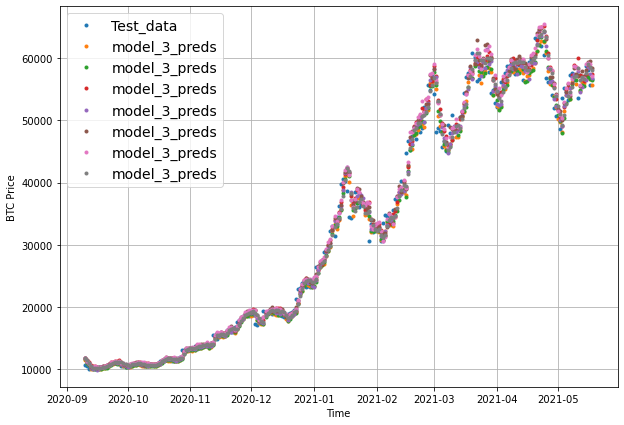

In [70]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")

plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

## Conv1D Model4

In [71]:
HORIZON = 1
WINDOW_SIZE = 7

In [72]:
full_windows, full_labels = make_windows(x=prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [73]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [74]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, strides=1, padding='causal', activation='relu'),
  layers.Dense(HORIZON)                    
], name="model_4_conv1D") 

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) 

model_4.fit(x=train_windows,
            y=train_labels, 
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1207.3818 - mae: 1207.3818 

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 6s 61ms/step - loss: 1207.3818 - mae: 1207.3818 - val_loss: 2320.6218 - val_mae: 2320.6218
Epoch 2/100
16/18 [=========================>....] - ETA: 0s - loss: 326.0714 - mae: 326.0714

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 41ms/step - loss: 316.2172 - mae: 316.2172 - val_loss: 1467.2803 - val_mae: 1467.2803
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 191.0238 - mae: 191.0238

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 47ms/step - loss: 192.6853 - mae: 192.6853 - val_loss: 1164.7076 - val_mae: 1164.7076
Epoch 4/100
15/18 [========================>.....] - ETA: 0s - loss: 178.7874 - mae: 178.7874

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 37ms/step - loss: 177.3535 - mae: 177.3535 - val_loss: 981.6695 - val_mae: 981.6695
Epoch 5/100
16/18 [=========================>....] - ETA: 0s - loss: 175.0630 - mae: 175.0630

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 39ms/step - loss: 172.3466 - mae: 172.3466 - val_loss: 960.8710 - val_mae: 960.8710
Epoch 6/100
11/18 [=================>............] - ETA: 0s - loss: 169.1571 - mae: 169.1571

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 42ms/step - loss: 171.9753 - mae: 171.9753 - val_loss: 950.2026 - val_mae: 950.2026
Epoch 7/100
13/18 [====================>.........] - ETA: 0s - loss: 175.5107 - mae: 175.5107

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 37ms/step - loss: 167.1943 - mae: 167.1943 - val_loss: 943.2873 - val_mae: 943.2873
Epoch 8/100
13/18 [====================>.........] - ETA: 0s - loss: 164.4446 - mae: 164.4446

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 39ms/step - loss: 163.5991 - mae: 163.5991 - val_loss: 905.5263 - val_mae: 905.5263
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 162.5455 - mae: 162.5455 - val_loss: 929.7610 - val_mae: 929.7610
Epoch 10/100
13/18 [====================>.........] - ETA: 0s - loss: 153.3015 - mae: 153.3015

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 36ms/step - loss: 158.5780 - mae: 158.5780 - val_loss: 871.9780 - val_mae: 871.9780
Epoch 11/100
13/18 [====================>.........] - ETA: 0s - loss: 159.4875 - mae: 159.4875

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 37ms/step - loss: 154.0058 - mae: 154.0058 - val_loss: 852.7120 - val_mae: 852.7120
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 151.2621 - mae: 151.2621 - val_loss: 944.1973 - val_mae: 944.1973
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 150.2688 - mae: 150.2688 - val_loss: 881.1827 - val_mae: 881.1827
Epoch 14/100
14/18 [======================>.......] - ETA: 0s - loss: 145.9749 - mae: 145.9749

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 48ms/step - loss: 145.4593 - mae: 145.4593 - val_loss: 849.1820 - val_mae: 849.1820
Epoch 15/100
10/18 [===============>..............] - ETA: 0s - loss: 142.9317 - mae: 142.9317

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 40ms/step - loss: 143.3640 - mae: 143.3640 - val_loss: 844.4008 - val_mae: 844.4008
Epoch 16/100
12/18 [===================>..........] - ETA: 0s - loss: 137.5655 - mae: 137.5655

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 47ms/step - loss: 139.8764 - mae: 139.8764 - val_loss: 806.7262 - val_mae: 806.7262
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 138.1677 - mae: 138.1677 - val_loss: 812.6343 - val_mae: 812.6343
Epoch 18/100
13/18 [====================>.........] - ETA: 0s - loss: 146.4718 - mae: 146.4718

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 36ms/step - loss: 137.9497 - mae: 137.9497 - val_loss: 775.2103 - val_mae: 775.2103
Epoch 19/100
18/18 [==============================] - ETA: 0s - loss: 131.1450 - mae: 131.1450

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 35ms/step - loss: 131.1450 - mae: 131.1450 - val_loss: 755.4261 - val_mae: 755.4261
Epoch 20/100
18/18 [==============================] - ETA: 0s - loss: 132.4057 - mae: 132.4057

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 35ms/step - loss: 132.4057 - mae: 132.4057 - val_loss: 712.2015 - val_mae: 712.2015
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 130.0737 - mae: 130.0737

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 39ms/step - loss: 131.0829 - mae: 131.0829 - val_loss: 707.4123 - val_mae: 707.4123
Epoch 22/100
13/18 [====================>.........] - ETA: 0s - loss: 134.5773 - mae: 134.5773

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 37ms/step - loss: 126.9511 - mae: 126.9511 - val_loss: 692.9739 - val_mae: 692.9739
Epoch 23/100
14/18 [======================>.......] - ETA: 0s - loss: 123.5648 - mae: 123.5648

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 35ms/step - loss: 125.1489 - mae: 125.1489 - val_loss: 682.4753 - val_mae: 682.4753
Epoch 24/100
13/18 [====================>.........] - ETA: 0s - loss: 125.0302 - mae: 125.0302

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 38ms/step - loss: 124.3786 - mae: 124.3786 - val_loss: 670.8320 - val_mae: 670.8320
Epoch 25/100
13/18 [====================>.........] - ETA: 0s - loss: 125.0353 - mae: 125.0353

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 39ms/step - loss: 121.6896 - mae: 121.6896 - val_loss: 662.6083 - val_mae: 662.6083
Epoch 26/100
14/18 [======================>.......] - ETA: 0s - loss: 122.1022 - mae: 122.1022

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 37ms/step - loss: 121.5706 - mae: 121.5706 - val_loss: 654.6090 - val_mae: 654.6090
Epoch 27/100
14/18 [======================>.......] - ETA: 0s - loss: 124.1863 - mae: 124.1863

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 38ms/step - loss: 122.6445 - mae: 122.6445 - val_loss: 650.9059 - val_mae: 650.9059
Epoch 28/100
14/18 [======================>.......] - ETA: 0s - loss: 115.2982 - mae: 115.2982

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 55ms/step - loss: 117.9561 - mae: 117.9561 - val_loss: 645.4810 - val_mae: 645.4810
Epoch 29/100
10/18 [===============>..............] - ETA: 0s - loss: 120.6806 - mae: 120.6806

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 41ms/step - loss: 117.1769 - mae: 117.1769 - val_loss: 639.9749 - val_mae: 639.9749
Epoch 30/100
14/18 [======================>.......] - ETA: 0s - loss: 120.0992 - mae: 120.0992

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 44ms/step - loss: 121.0467 - mae: 121.0467 - val_loss: 630.7948 - val_mae: 630.7948
Epoch 31/100
18/18 [==============================] - 0s 8ms/step - loss: 114.9061 - mae: 114.9061 - val_loss: 652.6466 - val_mae: 652.6466
Epoch 32/100
11/18 [=================>............] - ETA: 0s - loss: 117.7224 - mae: 117.7224

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 42ms/step - loss: 116.4312 - mae: 116.4312 - val_loss: 623.4982 - val_mae: 623.4982
Epoch 33/100
18/18 [==============================] - 0s 7ms/step - loss: 115.7972 - mae: 115.7972 - val_loss: 664.3214 - val_mae: 664.3214
Epoch 34/100
13/18 [====================>.........] - ETA: 0s - loss: 121.0527 - mae: 121.0527

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 38ms/step - loss: 117.2043 - mae: 117.2043 - val_loss: 613.7655 - val_mae: 613.7655
Epoch 35/100
18/18 [==============================] - 0s 7ms/step - loss: 113.4074 - mae: 113.4074 - val_loss: 619.6224 - val_mae: 619.6224
Epoch 36/100
12/18 [===================>..........] - ETA: 0s - loss: 113.9046 - mae: 113.9046

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 38ms/step - loss: 116.8330 - mae: 116.8330 - val_loss: 605.7616 - val_mae: 605.7616
Epoch 37/100
12/18 [===================>..........] - ETA: 0s - loss: 113.0536 - mae: 113.0536

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 39ms/step - loss: 114.7925 - mae: 114.7925 - val_loss: 603.6094 - val_mae: 603.6094
Epoch 38/100
11/18 [=================>............] - ETA: 0s - loss: 118.4905 - mae: 118.4905

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 40ms/step - loss: 113.0861 - mae: 113.0861 - val_loss: 602.5890 - val_mae: 602.5890
Epoch 39/100
13/18 [====================>.........] - ETA: 0s - loss: 114.0556 - mae: 114.0556

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 36ms/step - loss: 111.9831 - mae: 111.9831 - val_loss: 602.2946 - val_mae: 602.2946
Epoch 40/100
13/18 [====================>.........] - ETA: 0s - loss: 112.4667 - mae: 112.4667

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 37ms/step - loss: 111.2691 - mae: 111.2691 - val_loss: 600.5513 - val_mae: 600.5513
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 112.0727 - mae: 112.0727 - val_loss: 623.0612 - val_mae: 623.0612
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 116.7095 - mae: 116.7095 - val_loss: 645.0157 - val_mae: 645.0157
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 118.9676 - mae: 118.9676 - val_loss: 659.5663 - val_mae: 659.5663
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 125.4496 - mae: 125.4496 - val_loss: 678.8223 - val_mae: 678.8223
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 115.4361 - mae: 115.4361 - val_loss: 611.8370 - val_mae: 611.8370
Epoch 46/100
14/18 [======================>.......] - ETA: 0s - loss: 117.1332 - mae: 117.1332

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 46ms/step - loss: 114.1717 - mae: 114.1717 - val_loss: 589.6739 - val_mae: 589.6739
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 113.7248 - mae: 113.7248 - val_loss: 720.2486 - val_mae: 720.2486
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 112.0136 - mae: 112.0136 - val_loss: 597.4333 - val_mae: 597.4333
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 110.5681 - mae: 110.5681 - val_loss: 665.2031 - val_mae: 665.2031
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 119.7654 - mae: 119.7654 - val_loss: 635.1699 - val_mae: 635.1699
Epoch 51/100
14/18 [======================>.......] - ETA: 0s - loss: 112.0258 - mae: 112.0258

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 37ms/step - loss: 110.7739 - mae: 110.7739 - val_loss: 586.0247 - val_mae: 586.0247
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2179 - mae: 111.2179 - val_loss: 595.2480 - val_mae: 595.2480
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 113.6466 - mae: 113.6466 - val_loss: 670.5781 - val_mae: 670.5781
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 126.7883 - mae: 126.7883 - val_loss: 648.2971 - val_mae: 648.2971
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6968 - mae: 110.6968 - val_loss: 593.8553 - val_mae: 593.8553
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8592 - mae: 109.8592 - val_loss: 766.5007 - val_mae: 766.5007
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 124.8183 - mae: 124.8183 - val_loss: 712.2673 - val_mae: 712.2673
Epoch 58/100
18/18 [============

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 33ms/step - loss: 108.1684 - mae: 108.1684 - val_loss: 577.6281 - val_mae: 577.6281
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 108.7932 - mae: 108.7932 - val_loss: 610.1495 - val_mae: 610.1495
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 110.4675 - mae: 110.4675 - val_loss: 652.9429 - val_mae: 652.9429
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 110.7312 - mae: 110.7312 - val_loss: 583.0663 - val_mae: 583.0663
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 108.3487 - mae: 108.3487 - val_loss: 587.8363 - val_mae: 587.8363
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 108.0646 - mae: 108.0646 - val_loss: 648.5147 - val_mae: 648.5147
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 113.6957 - mae: 113.6957 - val_loss: 675.1593 - val_mae: 675.1593
Epoch 69/100
18/18 [============

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 40ms/step - loss: 106.6292 - mae: 106.6292 - val_loss: 575.4402 - val_mae: 575.4402
Epoch 82/100
17/18 [===========================>..] - ETA: 0s - loss: 113.1787 - mae: 113.1787

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 37ms/step - loss: 114.2934 - mae: 114.2934 - val_loss: 571.6199 - val_mae: 571.6199
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 111.1759 - mae: 111.1759 - val_loss: 666.0591 - val_mae: 666.0591
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2542 - mae: 112.2542 - val_loss: 580.0314 - val_mae: 580.0314
Epoch 85/100
18/18 [==============================] - 0s 7ms/step - loss: 107.7741 - mae: 107.7741 - val_loss: 599.6221 - val_mae: 599.6221
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 108.7533 - mae: 108.7533 - val_loss: 599.0880 - val_mae: 599.0880
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 106.9682 - mae: 106.9682 - val_loss: 596.5338 - val_mae: 596.5338
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 107.9607 - mae: 107.9607 - val_loss: 598.1053 - val_mae: 598.1053
Epoch 89/100
18/18 [============

INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 38ms/step - loss: 107.3045 - mae: 107.3045 - val_loss: 570.8284 - val_mae: 570.8284
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 108.0094 - mae: 108.0094 - val_loss: 642.3935 - val_mae: 642.3935
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 113.7574 - mae: 113.7574 - val_loss: 625.3718 - val_mae: 625.3718
Epoch 92/100
18/18 [==============================] - 0s 6ms/step - loss: 108.0016 - mae: 108.0016 - val_loss: 627.3057 - val_mae: 627.3057
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 118.0999 - mae: 118.0999 - val_loss: 637.1279 - val_mae: 637.1279
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 111.3195 - mae: 111.3195 - val_loss: 579.6982 - val_mae: 579.6982
Epoch 95/100
18/18 [==============================] - 0s 6ms/step - loss: 106.8561 - mae: 106.8561 - val_loss: 572.8485 - val_mae: 572.8485
Epoch 96/100
18/18 [============

In [75]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 8ms/step - loss: 610.1542 - mae: 610.1542


[610.1541748046875, 610.1541748046875]

In [76]:
model_4 = tf.keras.models.load_model('timeseries_experiments/model_4_conv1D')

In [77]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.8284 - mae: 570.8284


[570.8284301757812, 570.8284301757812]

In [78]:
model_4_preds = make_preds(model_4, test_windows)

18/18 [==============================] - 0s 1ms/step


In [79]:
model_4_result = evaluate_preds(y_true=tf.squeeze(test_labels),
                                y_pred = model_4_preds)

In [80]:
model_4_result

{'mae': 570.8284,
 'mse': 1176671.2,
 'rmse': 1084.7448,
 'mape': 2.5593357,
 'mase': 1.0027875}

## RNN model5

In [81]:
HORIZON = 1
WINDOW_SIZE = 7

In [82]:
full_windows, full_labels = make_windows(x=prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [83]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [84]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation='relu')(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=outputs, name="model_5_lstm")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) 

model_5.fit(x=train_windows,
            y=train_labels, 
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 2534.5144 - mae: 2534.5144 INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 3s 127ms/step - loss: 2323.6082 - mae: 2323.6082 - val_loss: 9222.6523 - val_mae: 9222.6523
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 706.6636 - mae: 706.6636 INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 92ms/step - loss: 695.4739 - mae: 695.4739 - val_loss: 1486.0555 - val_mae: 1486.0555
Epoch 3/100
12/18 [===================>..........] - ETA: 0s - loss: 266.4913 - mae: 266.4913INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 111ms/step - loss: 237.3967 - mae: 237.3967 - val_loss: 1298.9084 - val_mae: 1298.9084
Epoch 4/100
13/18 [====================>.........] - ETA: 0s - loss: 189.4982 - mae: 189.4982INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 117ms/step - loss: 181.9180 - mae: 181.9180 - val_loss: 966.6430 - val_mae: 966.6430
Epoch 5/100
18/18 [==============================] - 0s 13ms/step - loss: 173.4022 - mae: 173.4022 - val_loss: 970.9295 - val_mae: 970.9295
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 173.5414 - mae: 173.5414INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 130ms/step - loss: 173.5414 - mae: 173.5414 - val_loss: 941.4746 - val_mae: 941.4746
Epoch 7/100
14/18 [======================>.......] - ETA: 0s - loss: 178.5723 - mae: 178.5723INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 116ms/step - loss: 170.3566 - mae: 170.3566 - val_loss: 898.5215 - val_mae: 898.5215
Epoch 8/100
18/18 [==============================] - 0s 12ms/step - loss: 157.6712 - mae: 157.6712 - val_loss: 914.8641 - val_mae: 914.8641
Epoch 9/100
18/18 [==============================] - 0s 9ms/step - loss: 166.5143 - mae: 166.5143 - val_loss: 1079.0775 - val_mae: 1079.0775
Epoch 10/100
15/18 [========================>.....] - ETA: 0s - loss: 158.8814 - mae: 158.8814INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 122ms/step - loss: 162.3369 - mae: 162.3369 - val_loss: 877.1689 - val_mae: 877.1689
Epoch 11/100
18/18 [==============================] - 0s 8ms/step - loss: 163.0841 - mae: 163.0841 - val_loss: 924.1126 - val_mae: 924.1126
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 168.5598 - mae: 168.5598 - val_loss: 941.6025 - val_mae: 941.6025
Epoch 13/100
18/18 [==============================] - 0s 7ms/step - loss: 166.4727 - mae: 166.4727 - val_loss: 934.8435 - val_mae: 934.8436
Epoch 14/100
18/18 [==============================] - 0s 7ms/step - loss: 163.9537 - mae: 163.9537 - val_loss: 920.2159 - val_mae: 920.2159
Epoch 15/100
18/18 [==============================] - ETA: 0s - loss: 152.9470 - mae: 152.9470INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 106ms/step - loss: 152.9470 - mae: 152.9470 - val_loss: 856.2653 - val_mae: 856.2653
Epoch 16/100
18/18 [==============================] - 0s 9ms/step - loss: 147.4420 - mae: 147.4420 - val_loss: 898.9912 - val_mae: 898.9912
Epoch 17/100
18/18 [==============================] - 0s 8ms/step - loss: 151.0533 - mae: 151.0533 - val_loss: 943.1415 - val_mae: 943.1415
Epoch 18/100
18/18 [==============================] - 0s 9ms/step - loss: 157.8232 - mae: 157.8232 - val_loss: 924.0045 - val_mae: 924.0045
Epoch 19/100
18/18 [==============================] - 0s 8ms/step - loss: 155.9198 - mae: 155.9198 - val_loss: 911.4751 - val_mae: 911.4751
Epoch 20/100
18/18 [==============================] - 0s 8ms/step - loss: 155.6456 - mae: 155.6456 - val_loss: 862.6679 - val_mae: 862.6679
Epoch 21/100
18/18 [==============================] - 0s 8ms/step - loss: 153.1514 - mae: 153.1514 - val_loss: 862.5831 - val_mae: 862.5831
Epoch 22/100
18/18 [===========

INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 118ms/step - loss: 146.8467 - mae: 146.8467 - val_loss: 845.2780 - val_mae: 845.2780
Epoch 26/100
14/18 [======================>.......] - ETA: 0s - loss: 146.8086 - mae: 146.8086INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 102ms/step - loss: 145.9843 - mae: 145.9843 - val_loss: 818.6807 - val_mae: 818.6807
Epoch 27/100
17/18 [===========================>..] - ETA: 0s - loss: 143.6015 - mae: 143.6015INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 105ms/step - loss: 144.4289 - mae: 144.4289 - val_loss: 804.3278 - val_mae: 804.3278
Epoch 28/100
17/18 [===========================>..] - ETA: 0s - loss: 142.4588 - mae: 142.4588INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 101ms/step - loss: 142.4610 - mae: 142.4610 - val_loss: 789.0858 - val_mae: 789.0858
Epoch 29/100
18/18 [==============================] - 0s 8ms/step - loss: 141.8738 - mae: 141.8738 - val_loss: 806.6756 - val_mae: 806.6756
Epoch 30/100
18/18 [==============================] - 0s 10ms/step - loss: 142.0521 - mae: 142.0521 - val_loss: 794.8835 - val_mae: 794.8835
Epoch 31/100
10/18 [===============>..............] - ETA: 0s - loss: 142.2655 - mae: 142.2655INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 115ms/step - loss: 138.4690 - mae: 138.4690 - val_loss: 773.2811 - val_mae: 773.2811
Epoch 32/100
17/18 [===========================>..] - ETA: 0s - loss: 138.0486 - mae: 138.0486INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 101ms/step - loss: 137.1986 - mae: 137.1986 - val_loss: 772.2625 - val_mae: 772.2625
Epoch 33/100
18/18 [==============================] - 0s 9ms/step - loss: 135.9342 - mae: 135.9342 - val_loss: 786.4801 - val_mae: 786.4801
Epoch 34/100
15/18 [========================>.....] - ETA: 0s - loss: 135.2165 - mae: 135.2165INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 94ms/step - loss: 136.1931 - mae: 136.1931 - val_loss: 744.4506 - val_mae: 744.4506
Epoch 35/100
18/18 [==============================] - 0s 10ms/step - loss: 133.4514 - mae: 133.4514 - val_loss: 756.2968 - val_mae: 756.2968
Epoch 36/100
11/18 [=================>............] - ETA: 0s - loss: 134.1216 - mae: 134.1216INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 96ms/step - loss: 134.0992 - mae: 134.0992 - val_loss: 735.1729 - val_mae: 735.1729
Epoch 37/100
18/18 [==============================] - 0s 7ms/step - loss: 130.6932 - mae: 130.6932 - val_loss: 745.9096 - val_mae: 745.9096
Epoch 38/100
18/18 [==============================] - ETA: 0s - loss: 129.2891 - mae: 129.2891INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 109ms/step - loss: 129.2891 - mae: 129.2891 - val_loss: 717.2498 - val_mae: 717.2498
Epoch 39/100
18/18 [==============================] - 0s 9ms/step - loss: 129.6088 - mae: 129.6088 - val_loss: 719.0669 - val_mae: 719.0669
Epoch 40/100
18/18 [==============================] - 0s 8ms/step - loss: 129.6111 - mae: 129.6111 - val_loss: 732.0630 - val_mae: 732.0630
Epoch 41/100
12/18 [===================>..........] - ETA: 0s - loss: 130.4034 - mae: 130.4034INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 92ms/step - loss: 127.1393 - mae: 127.1393 - val_loss: 702.9354 - val_mae: 702.9354
Epoch 42/100
12/18 [===================>..........] - ETA: 0s - loss: 124.3231 - mae: 124.3231INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 87ms/step - loss: 125.6113 - mae: 125.6113 - val_loss: 700.8699 - val_mae: 700.8699
Epoch 43/100
18/18 [==============================] - 0s 9ms/step - loss: 125.9959 - mae: 125.9959 - val_loss: 704.3680 - val_mae: 704.3680
Epoch 44/100
18/18 [==============================] - 0s 10ms/step - loss: 125.2330 - mae: 125.2330 - val_loss: 719.1411 - val_mae: 719.1411
Epoch 45/100
16/18 [=========================>....] - ETA: 0s - loss: 127.1023 - mae: 127.1023INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 89ms/step - loss: 129.0878 - mae: 129.0878 - val_loss: 687.3796 - val_mae: 687.3796
Epoch 46/100
18/18 [==============================] - 0s 7ms/step - loss: 124.9461 - mae: 124.9461 - val_loss: 706.3905 - val_mae: 706.3905
Epoch 47/100
11/18 [=================>............] - ETA: 0s - loss: 113.6044 - mae: 113.6044INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 101ms/step - loss: 126.0465 - mae: 126.0465 - val_loss: 678.0845 - val_mae: 678.0845
Epoch 48/100
17/18 [===========================>..] - ETA: 0s - loss: 123.9447 - mae: 123.9447INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 87ms/step - loss: 123.9412 - mae: 123.9412 - val_loss: 677.1480 - val_mae: 677.1480
Epoch 49/100
18/18 [==============================] - 0s 8ms/step - loss: 123.1814 - mae: 123.1814 - val_loss: 700.9755 - val_mae: 700.9755
Epoch 50/100
18/18 [==============================] - 0s 8ms/step - loss: 125.1446 - mae: 125.1446 - val_loss: 725.7572 - val_mae: 725.7573
Epoch 51/100
18/18 [==============================] - 0s 9ms/step - loss: 125.5208 - mae: 125.5208 - val_loss: 780.1040 - val_mae: 780.1040
Epoch 52/100
12/18 [===================>..........] - ETA: 0s - loss: 131.7064 - mae: 131.7064INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 90ms/step - loss: 123.5061 - mae: 123.5061 - val_loss: 663.2543 - val_mae: 663.2543
Epoch 53/100
18/18 [==============================] - 0s 7ms/step - loss: 120.0524 - mae: 120.0524 - val_loss: 665.6277 - val_mae: 665.6277
Epoch 54/100
12/18 [===================>..........] - ETA: 0s - loss: 117.8855 - mae: 117.8855INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 94ms/step - loss: 120.4394 - mae: 120.4394 - val_loss: 658.1812 - val_mae: 658.1812
Epoch 55/100
15/18 [========================>.....] - ETA: 0s - loss: 122.3055 - mae: 122.3055INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 102ms/step - loss: 118.6817 - mae: 118.6817 - val_loss: 650.8017 - val_mae: 650.8017
Epoch 56/100
18/18 [==============================] - ETA: 0s - loss: 120.2385 - mae: 120.2385INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 93ms/step - loss: 120.2385 - mae: 120.2385 - val_loss: 646.9162 - val_mae: 646.9162
Epoch 57/100
18/18 [==============================] - 0s 10ms/step - loss: 123.6108 - mae: 123.6108 - val_loss: 676.0363 - val_mae: 676.0363
Epoch 58/100
18/18 [==============================] - ETA: 0s - loss: 118.2166 - mae: 118.2166INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 88ms/step - loss: 118.2166 - mae: 118.2166 - val_loss: 642.8526 - val_mae: 642.8526
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 117.8050 - mae: 117.8050 - val_loss: 644.1140 - val_mae: 644.1140
Epoch 60/100
11/18 [=================>............] - ETA: 0s - loss: 118.4157 - mae: 118.4157INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 93ms/step - loss: 118.0277 - mae: 118.0277 - val_loss: 640.6298 - val_mae: 640.6298
Epoch 61/100
18/18 [==============================] - 0s 9ms/step - loss: 117.6757 - mae: 117.6757 - val_loss: 674.2546 - val_mae: 674.2546
Epoch 62/100
18/18 [==============================] - 0s 10ms/step - loss: 120.8419 - mae: 120.8419 - val_loss: 736.8734 - val_mae: 736.8734
Epoch 63/100
18/18 [==============================] - 0s 9ms/step - loss: 122.4814 - mae: 122.4814 - val_loss: 641.0597 - val_mae: 641.0597
Epoch 64/100
18/18 [==============================] - 0s 8ms/step - loss: 115.6879 - mae: 115.6879 - val_loss: 665.2364 - val_mae: 665.2364
Epoch 65/100
11/18 [=================>............] - ETA: 0s - loss: 119.7511 - mae: 119.7511INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 108ms/step - loss: 117.8764 - mae: 117.8764 - val_loss: 629.4848 - val_mae: 629.4848
Epoch 66/100
17/18 [===========================>..] - ETA: 0s - loss: 116.1205 - mae: 116.1205INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 101ms/step - loss: 115.7342 - mae: 115.7342 - val_loss: 627.8654 - val_mae: 627.8654
Epoch 67/100
18/18 [==============================] - ETA: 0s - loss: 116.0720 - mae: 116.0720INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 90ms/step - loss: 116.0720 - mae: 116.0720 - val_loss: 624.9843 - val_mae: 624.9843
Epoch 68/100
18/18 [==============================] - 0s 9ms/step - loss: 115.8544 - mae: 115.8544 - val_loss: 626.7468 - val_mae: 626.7468
Epoch 69/100
 9/18 [==============>...............] - ETA: 0s - loss: 127.0613 - mae: 127.0613INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 91ms/step - loss: 119.5743 - mae: 119.5743 - val_loss: 623.6360 - val_mae: 623.6360
Epoch 70/100
17/18 [===========================>..] - ETA: 0s - loss: 113.9016 - mae: 113.9016INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 102ms/step - loss: 115.2881 - mae: 115.2881 - val_loss: 623.5431 - val_mae: 623.5431
Epoch 71/100
18/18 [==============================] - 0s 8ms/step - loss: 114.6981 - mae: 114.6981 - val_loss: 640.9242 - val_mae: 640.9242
Epoch 72/100
 9/18 [==============>...............] - ETA: 0s - loss: 116.2821 - mae: 116.2821INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 87ms/step - loss: 117.3488 - mae: 117.3488 - val_loss: 621.0178 - val_mae: 621.0178
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 114.7942 - mae: 114.7942 - val_loss: 629.5701 - val_mae: 629.5701
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 115.1500 - mae: 115.1500 - val_loss: 626.9415 - val_mae: 626.9415
Epoch 75/100
18/18 [==============================] - 0s 7ms/step - loss: 115.9312 - mae: 115.9312 - val_loss: 662.2502 - val_mae: 662.2502
Epoch 76/100
12/18 [===================>..........] - ETA: 0s - loss: 114.3966 - mae: 114.3966INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 86ms/step - loss: 115.1412 - mae: 115.1412 - val_loss: 620.8359 - val_mae: 620.8359
Epoch 77/100
18/18 [==============================] - 0s 9ms/step - loss: 117.6456 - mae: 117.6456 - val_loss: 668.2390 - val_mae: 668.2390
Epoch 78/100
18/18 [==============================] - 0s 8ms/step - loss: 117.0707 - mae: 117.0707 - val_loss: 628.1731 - val_mae: 628.1731
Epoch 79/100
13/18 [====================>.........] - ETA: 0s - loss: 110.3536 - mae: 110.3536INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 93ms/step - loss: 113.6489 - mae: 113.6489 - val_loss: 610.1957 - val_mae: 610.1957
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 113.0044 - mae: 113.0044 - val_loss: 624.5187 - val_mae: 624.5187
Epoch 81/100
18/18 [==============================] - 0s 8ms/step - loss: 113.2803 - mae: 113.2803 - val_loss: 632.4530 - val_mae: 632.4530
Epoch 82/100
11/18 [=================>............] - ETA: 0s - loss: 122.9358 - mae: 122.9358INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 101ms/step - loss: 115.9831 - mae: 115.9831 - val_loss: 607.7241 - val_mae: 607.7241
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 113.7448 - mae: 113.7448 - val_loss: 622.1393 - val_mae: 622.1393
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 114.0071 - mae: 114.0071 - val_loss: 619.6950 - val_mae: 619.6950
Epoch 85/100
18/18 [==============================] - 0s 7ms/step - loss: 114.1199 - mae: 114.1199 - val_loss: 640.6756 - val_mae: 640.6756
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 115.0656 - mae: 115.0656 - val_loss: 613.5978 - val_mae: 613.5978
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2010 - mae: 112.2010 - val_loss: 607.8956 - val_mae: 607.8956
Epoch 88/100
12/18 [===================>..........] - ETA: 0s - loss: 115.6933 - mae: 115.6933INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets

INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 84ms/step - loss: 112.1981 - mae: 112.1981 - val_loss: 601.7839 - val_mae: 601.7839
Epoch 89/100
18/18 [==============================] - 0s 7ms/step - loss: 112.8817 - mae: 112.8817 - val_loss: 647.1225 - val_mae: 647.1225
Epoch 90/100
18/18 [==============================] - 0s 9ms/step - loss: 118.4780 - mae: 118.4780 - val_loss: 660.7481 - val_mae: 660.7481
Epoch 91/100
18/18 [==============================] - 0s 7ms/step - loss: 118.6482 - mae: 118.6482 - val_loss: 685.7650 - val_mae: 685.7650
Epoch 92/100
18/18 [==============================] - 0s 7ms/step - loss: 114.3789 - mae: 114.3789 - val_loss: 622.2435 - val_mae: 622.2435
Epoch 93/100
13/18 [====================>.........] - ETA: 0s - loss: 115.3892 - mae: 115.3892INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 1s 83ms/step - loss: 113.3837 - mae: 113.3837 - val_loss: 599.4068 - val_mae: 599.4068
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 111.0267 - mae: 111.0267 - val_loss: 600.6318 - val_mae: 600.6318
Epoch 95/100
10/18 [===============>..............] - ETA: 0s - loss: 108.4071 - mae: 108.4071INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 91ms/step - loss: 111.1373 - mae: 111.1373 - val_loss: 597.5020 - val_mae: 597.5020
Epoch 96/100
18/18 [==============================] - 0s 9ms/step - loss: 111.1646 - mae: 111.1646 - val_loss: 603.2917 - val_mae: 603.2917
Epoch 97/100
18/18 [==============================] - 0s 10ms/step - loss: 111.7010 - mae: 111.7010 - val_loss: 618.8985 - val_mae: 618.8985
Epoch 98/100
18/18 [==============================] - 0s 9ms/step - loss: 111.8481 - mae: 111.8481 - val_loss: 598.4055 - val_mae: 598.4055
Epoch 99/100
12/18 [===================>..........] - ETA: 0s - loss: 109.3836 - mae: 109.3836INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_5_lstm\assets


18/18 [==============================] - 2s 107ms/step - loss: 110.7292 - mae: 110.7292 - val_loss: 596.6447 - val_mae: 596.6447
Epoch 100/100
18/18 [==============================] - 0s 10ms/step - loss: 112.5656 - mae: 112.5656 - val_loss: 597.1186 - val_mae: 597.1186


In [85]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 597.1186 - mae: 597.1186


[597.1185913085938, 597.1185913085938]

In [86]:
model_5 = tf.keras.models.load_model('timeseries_experiments/model_4_conv1D')

In [87]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 570.8284 - mae: 570.8284


[570.8284301757812, 570.8284301757812]

In [88]:
model_5_preds = make_preds(model_4, test_windows)

18/18 [==============================] - 0s 3ms/step


In [89]:
model_5_result = evaluate_preds(y_true=tf.squeeze(test_labels),
                                y_pred = model_4_preds)

In [90]:
model_5_result

{'mae': 570.8284,
 'mse': 1176671.2,
 'rmse': 1084.7448,
 'mape': 2.5593357,
 'mase': 1.0027875}

## Multivariate Data model6

In [91]:
block_reward_1 = 50 
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

In [92]:
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [93]:
block_reward_2_days = (block_reward_3_datetime - df.index[0]).days
block_reward_3_days = (block_reward_4_datetime - df.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [94]:
df_reward = df.copy()

In [95]:
df_reward['block_reward'] = None

In [96]:
df_reward

,Price,block_reward
Date,,
2013-10-01,123.654990,None
2013-10-02,125.455000,None
2013-10-03,108.584830,None
2013-10-04,118.674660,None
2013-10-05,121.338660,None
...,...,...
2021-05-14,49764.132082,None
2021-05-15,50032.693137,None
2021-05-16,47885.625255,None


In [97]:
df_reward.iloc[:block_reward_2_days, -1] = block_reward_2

In [98]:
df_reward.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3

In [99]:
df_reward.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [100]:
len(df)

2787

In [101]:
df_reward.iloc[block_reward_3_days:, -1] = block_reward_4

In [102]:
df_reward['block_reward'].value_counts()

12.50    1402
25.00    1012
6.25      373
Name: block_reward, dtype: int64

In [103]:
df_reward.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


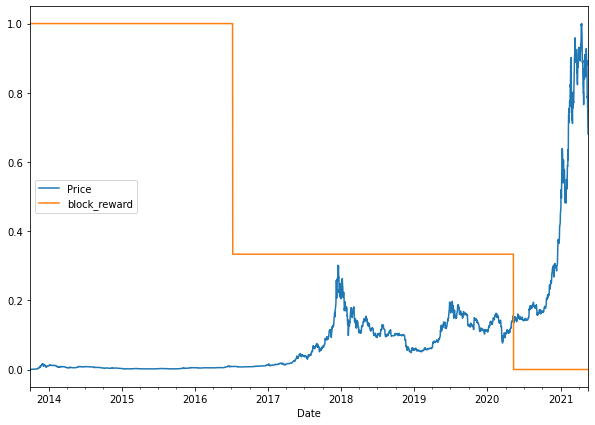

In [104]:
from sklearn.preprocessing import minmax_scale
scaled_df_reward = pd.DataFrame(minmax_scale(df_reward[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=df_reward.columns,
                                     index=df_reward.index)
scaled_df_reward.plot(figsize=(10, 7));

In [105]:
HORIZON = 1
WINDOW_SIZE = 7

In [106]:
bitcoin_prices_windowed = df.copy()

for i in range(WINDOW_SIZE): 
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [107]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32) 
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,
2013-10-08,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [108]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [109]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [110]:
tf.random.set_seed(42)


model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")


model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())


model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, 
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: timeseries_experiments\model_6_dense_multivariate\assets


In [111]:
model_6 = tf.keras.models.load_model("timeseries_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.5763


567.5762939453125

In [112]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8827.232, 8758.462, 9021.147, 8749.453, 8708.383, 8729.302,
       8650.128, 8515.998, 8427.988, 8514.476], dtype=float32)>

In [113]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 567.5763,
 'mse': 1168397.4,
 'rmse': 1080.9243,
 'mape': 2.549981,
 'mase': 0.99707437}

In [114]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, 
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): 
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): 
    x = inputs 
    for layer in self.hidden:  
      x = layer(x)
    theta = self.theta_layer(x) 
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    
    return backcast, forecast

In [115]:
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [116]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [117]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.19014978  0.83798355 -0.32870018  0.25159916 -0.47540277 -0.77836645
 -0.5299447 ]
Forecast: -0.7554212808609009


In [118]:
HORIZON = 1 
WINDOW_SIZE = 7

In [119]:
df.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [120]:
bitcoin_prices_nbeats = df.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [121]:
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [122]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

BATCH_SIZE = 1024 
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [123]:
N_EPOCHS = 5000 
N_NEURONS = 512 
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON 
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [124]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

subtracted = layers.subtract([tensor_1, tensor_2])

added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [125]:
%%time

tf.random.set_seed(42)

nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

backcast, forecast = nbeats_block_layer(stack_input)
 
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 


for i, _ in enumerate(range(N_STACKS-1)): 
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) 

  
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")


model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_N-BEATS")


model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])


model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 147: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 254: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 354: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: total: 1min 55s
Wall time: 1min 53s


In [126]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 37ms/step - loss: 590.3573 - mae: 590.3573 - mse: 1213859.3750


[590.3572998046875, 590.3572998046875, 1213859.375]

In [127]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8931.178, 8847.119, 9018.289, 8815.797, 8818.937, 8781.906,
       8667.237, 8571.674, 8512.6  , 8513.776], dtype=float32)>

In [128]:
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 590.3573,
 'mse': 1213859.4,
 'rmse': 1101.7528,
 'mape': 2.7346258,
 'mase': 1.0370942}

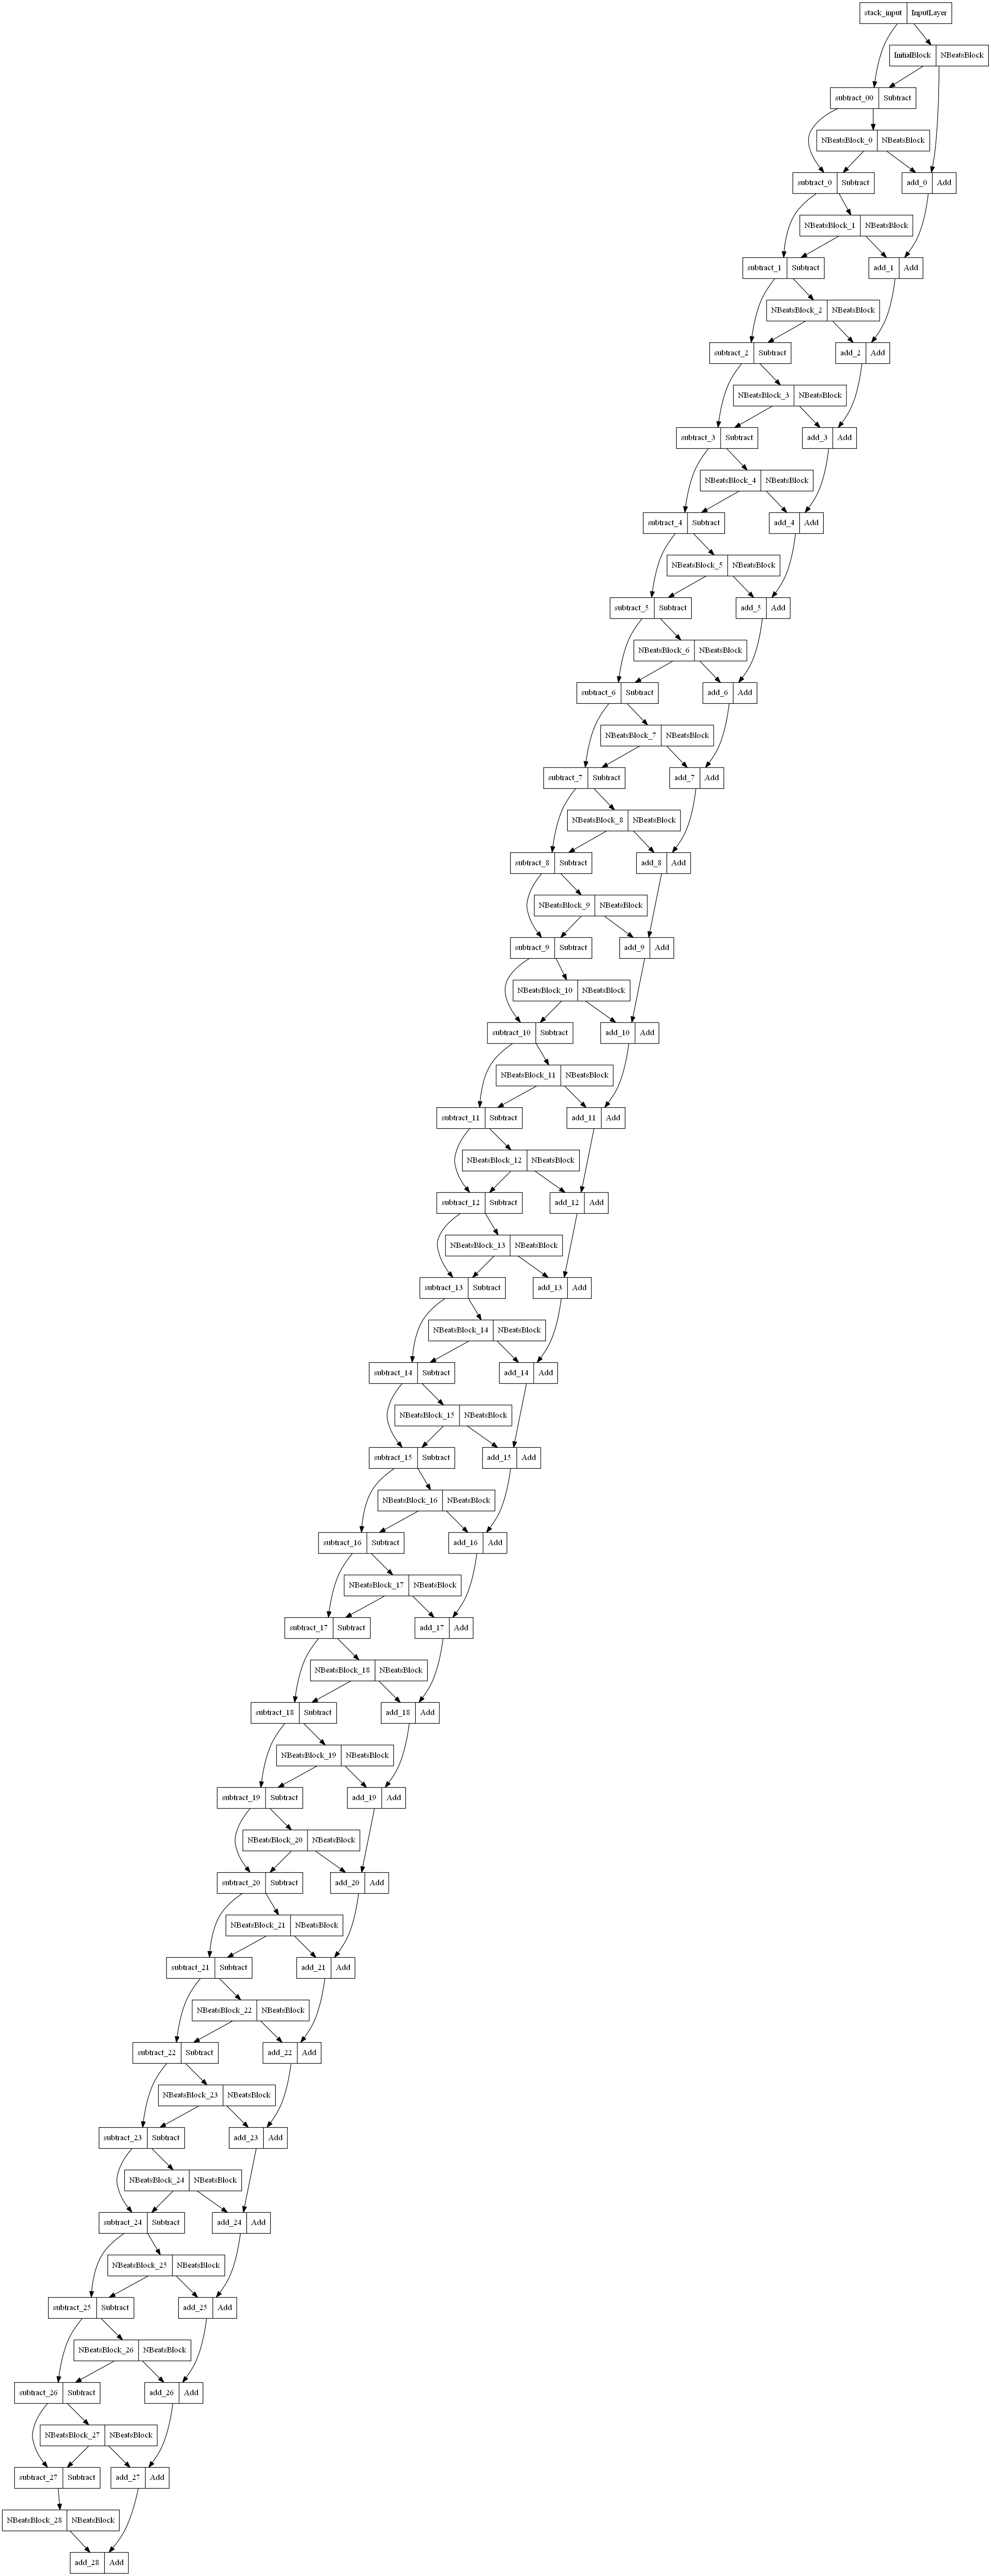

In [129]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [130]:
model_7.save(model_7.name)

INFO:tensorflow:Assets written to: model_7_N-BEATS\assets


INFO:tensorflow:Assets written to: model_7_N-BEATS\assets


## Model8 Ensamble

In [131]:
HORIZON, WINDOW_SIZE

(1, 7)

In [134]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset, 
                        test_data=test_dataset, 
                        num_iter=10, 
                        num_epochs=1000,
                        loss_fns=['mae', 'mse', 'mape']):
    ensemble_models=[]
    
    for i in range(num_iter):
        for loss_function in loss_fns:
            print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

            model = tf.keras.Sequential([
                layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
                layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                layers.Dense(HORIZON)                                 
                ])
            
            model.compile(loss=loss_function,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['accuracy'])
            
            model.fit(train_data,
                      epochs=num_epochs,
                      verbose=0,
                      validation_data=test_data,
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                  patience=200,
                                                                  restore_best_weights=True),
                                 tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                      patience=100,
                                                                      verbose=1)])
            ensemble_models.append(model)
    return ensemble_models

In [135]:
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 672: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 860: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 960: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 547: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 647: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 165: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 282: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 382: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 365: ReduceLROnPl